training started
training finished


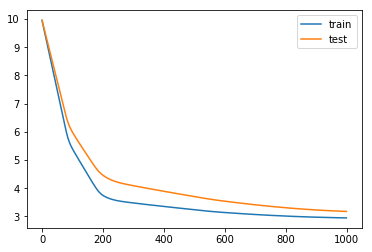

In [4]:
# -*- coding: utf-8 -*-

# Required Packages
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

X,y = load_svmlight_file("australian_scale.txt")
toappend = np.ones([X.shape[0],1])
X = X.toarray()
X = np.hstack((X,toappend))
y = y.reshape((y.shape[0],1))
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

n = X_train.shape[0]
m = X_train.shape[1]

def loss_func(X,y,W,C):
    loss_ = 0.0
    n,m = np.shape(X)
    for i in range(n):
        loss_ += max(0,1-y[i]*W.T.dot(X[i]))
    loss_ = loss_/n*C
    loss_ += (W.T.dot(W)[0][0]/n/2)
    return loss_

def gradient(X,y,W,C):
    n,m = X.shape
    M = np.zeros([n,1])
    for i in range(n):
        if 1-y[i]*(W.T.dot(X[i])) >= 0:
            M[i][0] = 1
    y_ = M*y
    return (W-C*X.T.dot(y_))/n

W = np.zeros([m,1])

learn_rate = 0.0005
C = 10
loss_train = []
loss_test = []
print ('training started')
for i in range(1000):
    G = gradient(X_train,y_train,W,C)
    W = W-learn_rate*G
    loss_train.append(loss_func(X_train,y_train,W,C))
    loss_test.append(loss_func(X_test,y_test,W,C))
print ('training finished')

plt.plot(loss_train,label = 'train')
plt.plot(loss_test, label = 'test' )
plt.legend(loc='upper right')
plt.show()
